## 1.2 Problem Statement 

#### Build a predictive model to estimate the likelihood of customer churn for a telecommunication company. The model should consider factors such as customer demographics, usage patterns, billing history, and customer service interactions.

In [192]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv(r"C:\Users\Akanksha\Downloads\archive (39)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [194]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [195]:
df.shape

(7043, 21)

In [196]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [198]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [200]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '')

In [201]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

In [202]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [204]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [205]:
df.dropna(subset = ['TotalCharges'], inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [206]:
df.shape

(7032, 21)

In [207]:
df.pop('customerID')

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

In [208]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [209]:
df.duplicated().sum()

22

In [210]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [211]:
df.drop_duplicates(inplace = True)

In [212]:
df.duplicated().sum()

0

In [213]:
df.shape

(7010, 20)

## Data Exploration

### CATEGORICAL OR DISCRETE NUMERICAL COLUMNS

#### UNIVARIATE NON-VIZ FOR CATEGORICAL COLUMNS

In [214]:
object_cols = df.select_dtypes(include=['object'])

In [215]:
object_cols.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [216]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts(normalize = True)*100)
        print()

In [217]:
discrete_univariate_analysis(object_cols)

********** gender **********
count                7010
nunique                 2
unique     [Female, Male]
Name: gender, dtype: object
Value Counts: 
 Male      50.42796
Female    49.57204
Name: gender, dtype: float64

********** SeniorCitizen **********
count        7010
nunique         2
unique     [0, 1]
Name: SeniorCitizen, dtype: object
Value Counts: 
 0    83.723252
1    16.276748
Name: SeniorCitizen, dtype: float64

********** Partner **********
count           7010
nunique            2
unique     [Yes, No]
Name: Partner, dtype: object
Value Counts: 
 No     51.597718
Yes    48.402282
Name: Partner, dtype: float64

********** Dependents **********
count           7010
nunique            2
unique     [No, Yes]
Name: Dependents, dtype: object
Value Counts: 
 No     70.057061
Yes    29.942939
Name: Dependents, dtype: float64

********** PhoneService **********
count           7010
nunique            2
unique     [No, Yes]
Name: PhoneService, dtype: object
Value Counts: 
 Yes    90.

#### UNIVARIATE VIZ FOR CATEGORICAL COLUMNS

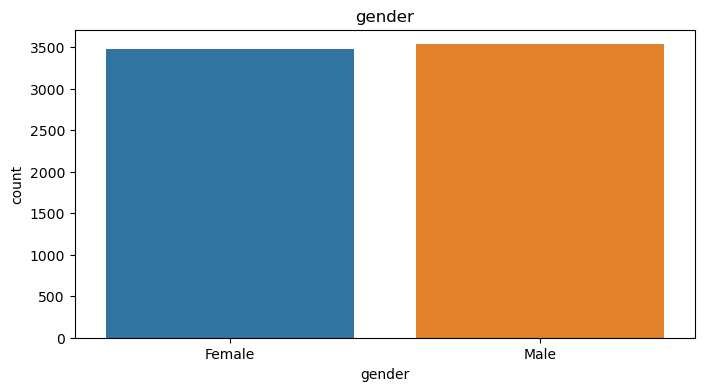

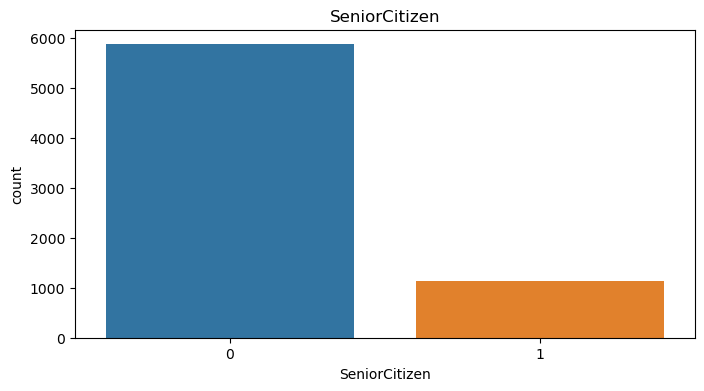

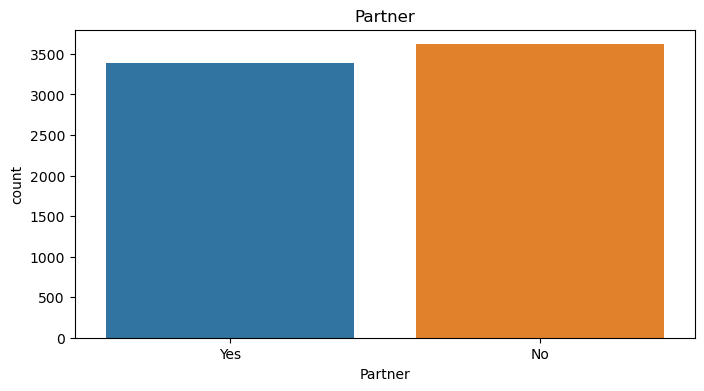

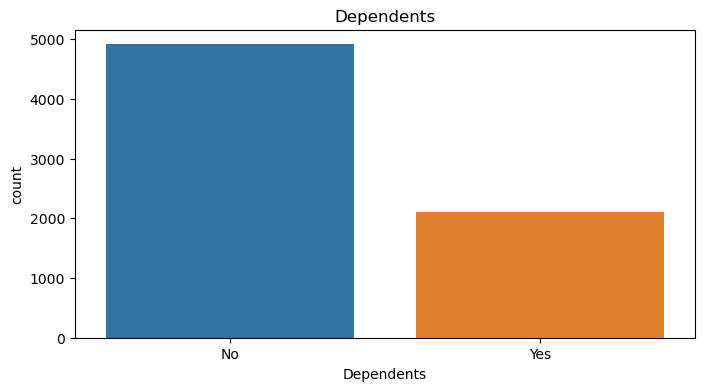

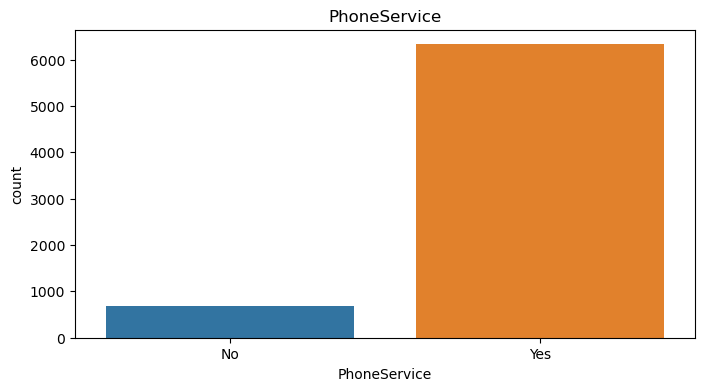

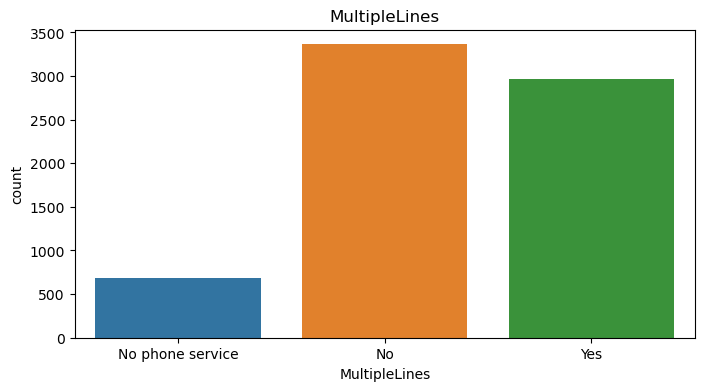

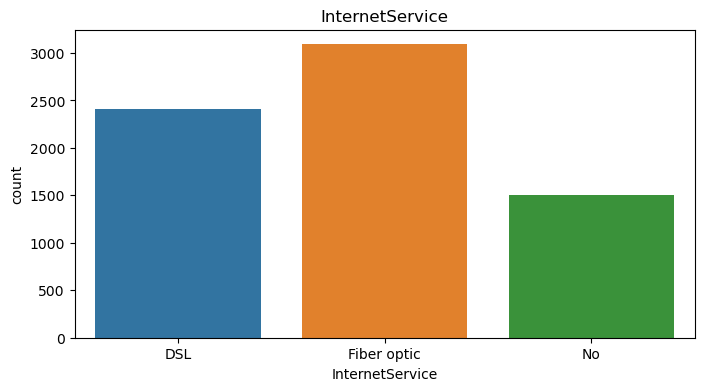

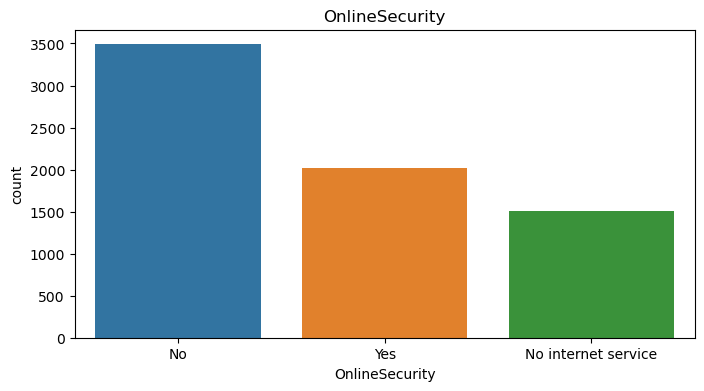

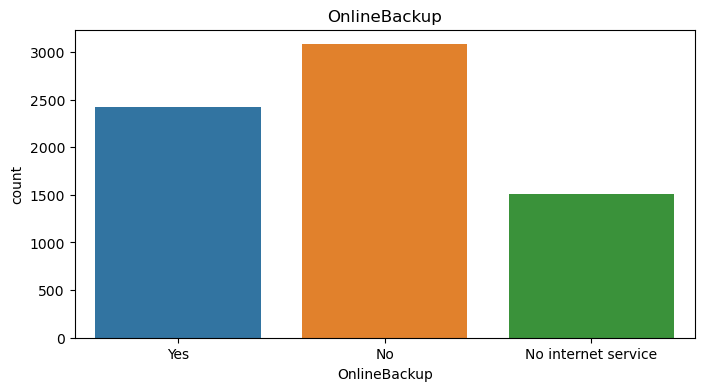

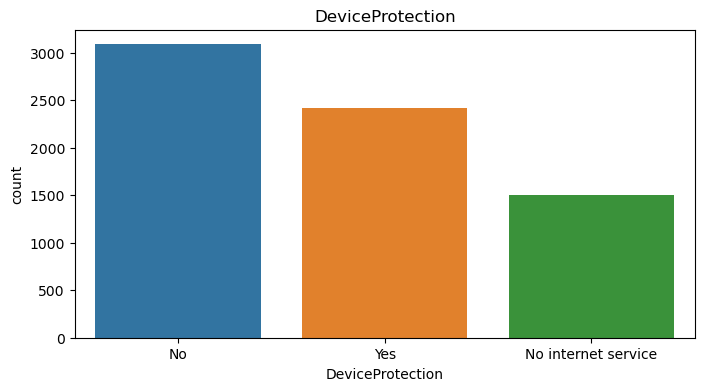

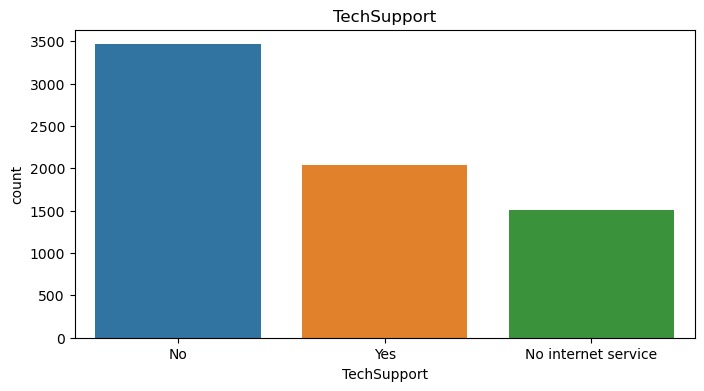

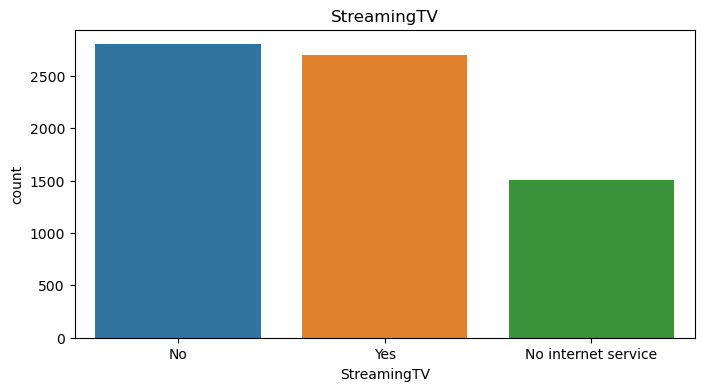

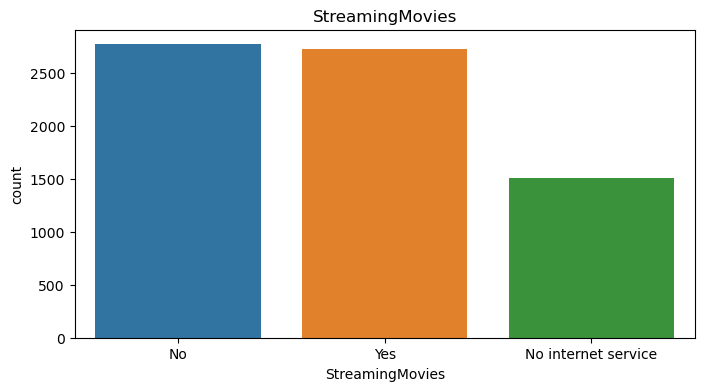

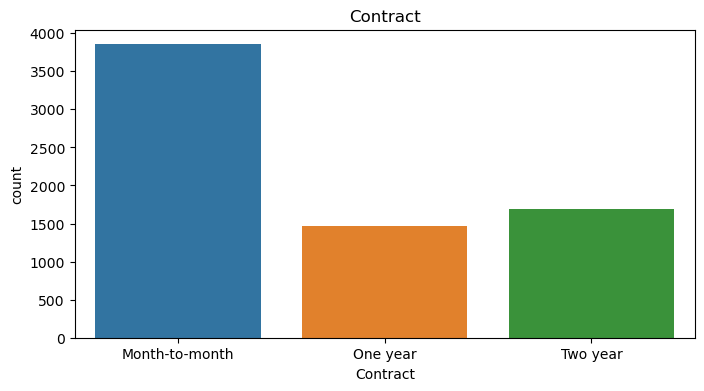

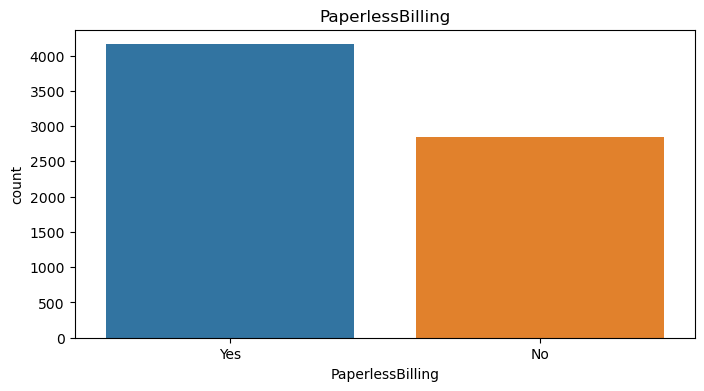

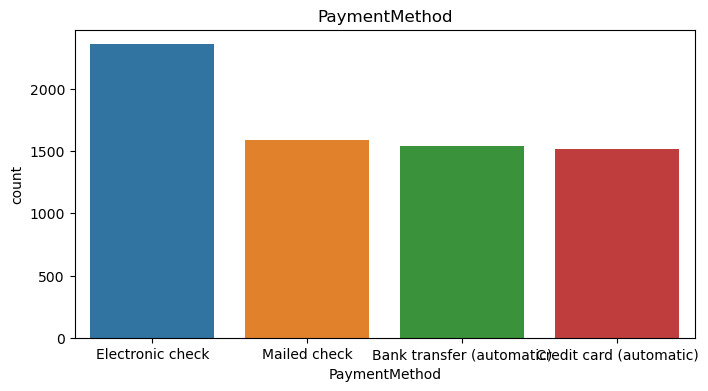

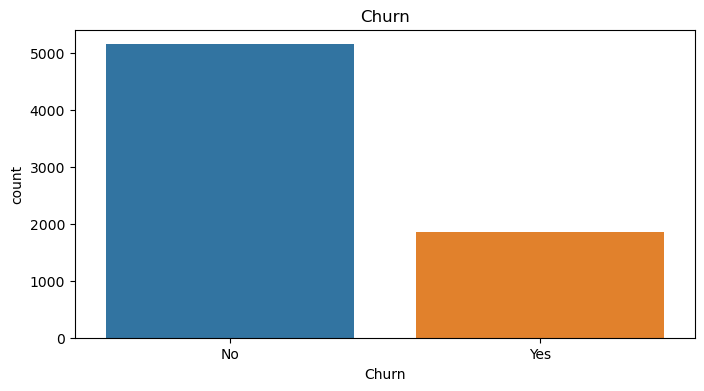

In [218]:
for col in object_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col}')

#### BIVARIATE NON-VIZ FOR CATEGORICAL COLUMN

In [219]:
for col in object_cols:
    var = df.groupby('Churn')
    print(var[col].value_counts())

Churn  gender
No     Male      2612
       Female    2541
Yes    Female     934
       Male       923
Name: gender, dtype: int64
Churn  SeniorCitizen
No     0                4487
       1                 666
Yes    0                1382
       1                 475
Name: SeniorCitizen, dtype: int64
Churn  Partner
No     Yes        2724
       No         2429
Yes    No         1188
       Yes         669
Name: Partner, dtype: int64
Churn  Dependents
No     No            3380
       Yes           1773
Yes    No            1531
       Yes            326
Name: Dependents, dtype: int64
Churn  PhoneService
No     Yes             4643
       No               510
Yes    Yes             1687
       No               170
Name: PhoneService, dtype: int64
Churn  MultipleLines   
No     No                  2526
       Yes                 2117
       No phone service     510
Yes    Yes                  850
       No                   837
       No phone service     170
Name: MultipleLines, dtype: int

#### BIVARIATE VIZ FOR CATEGORICAL COLUMN

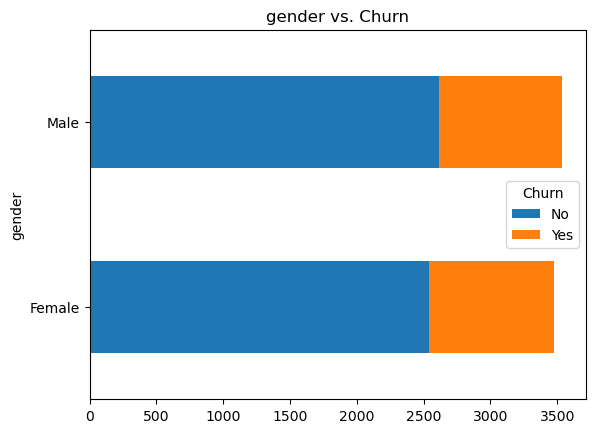

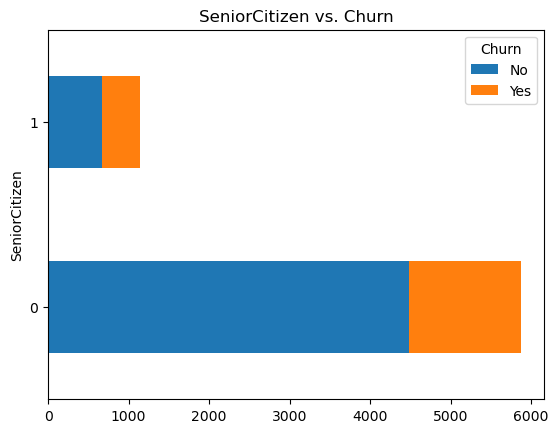

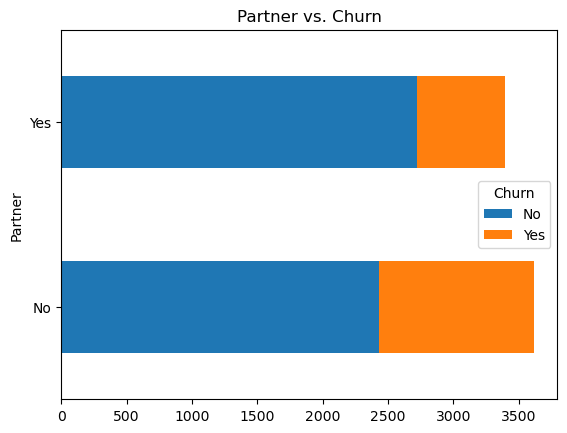

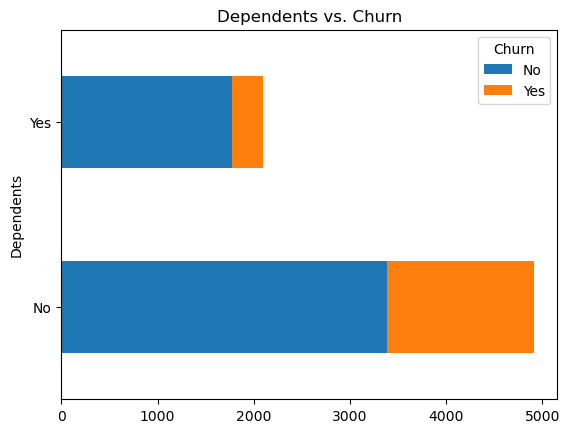

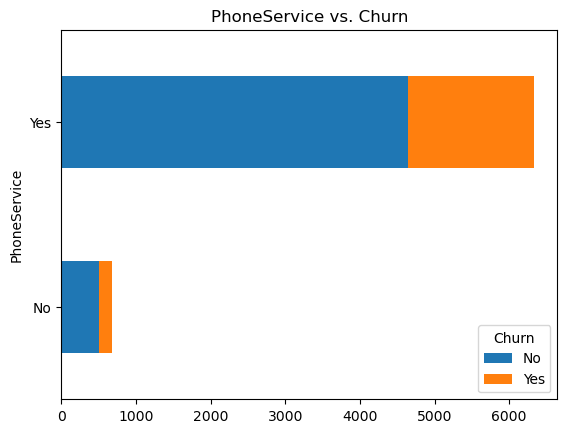

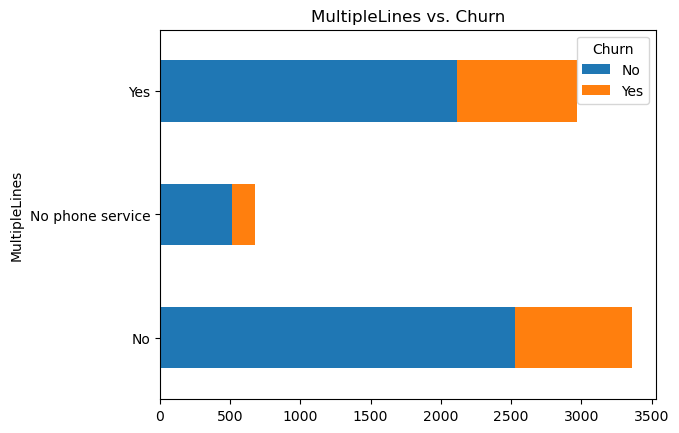

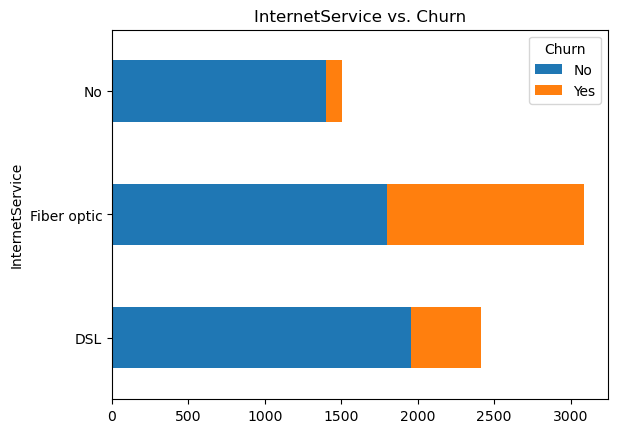

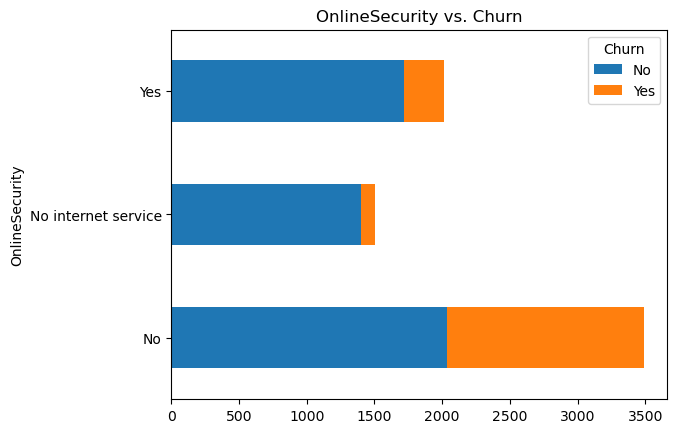

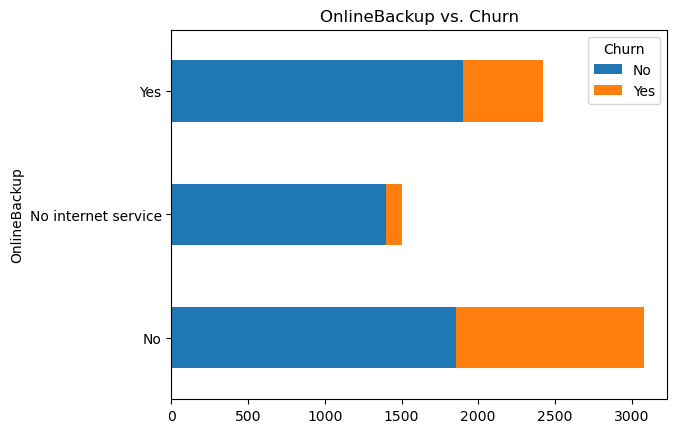

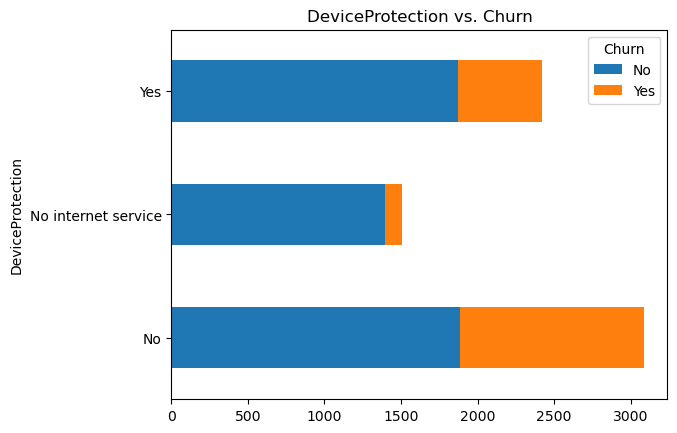

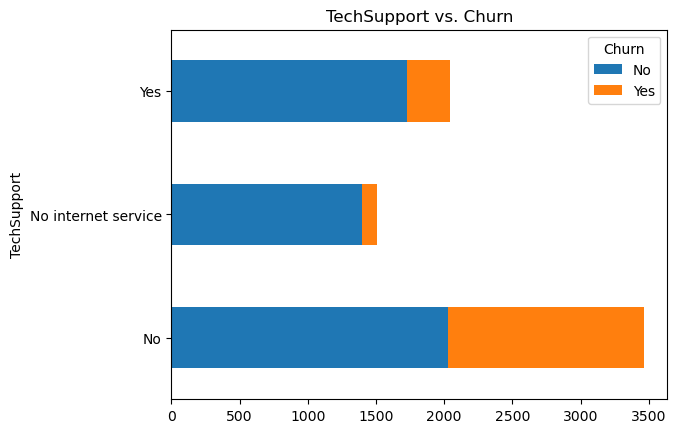

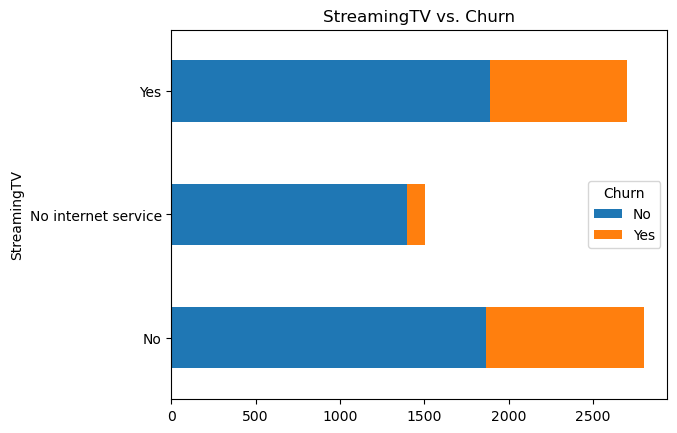

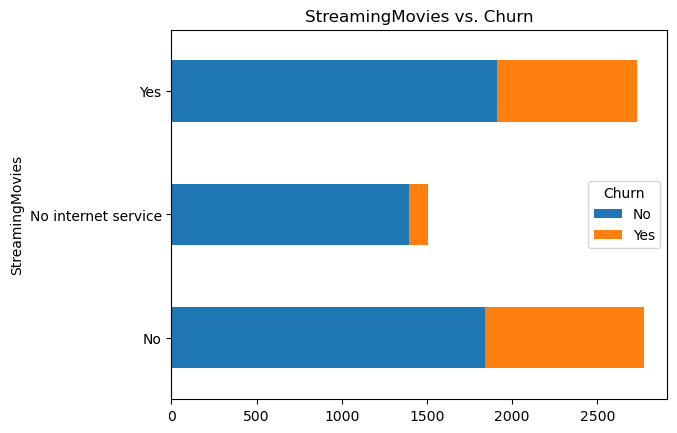

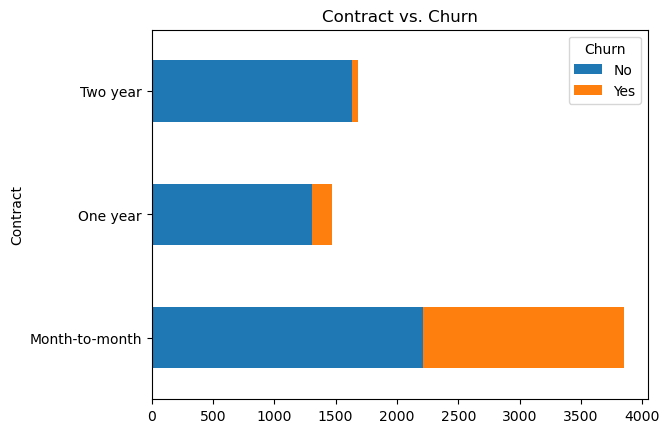

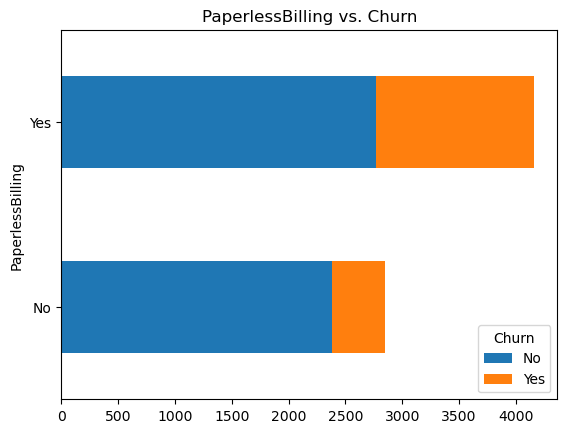

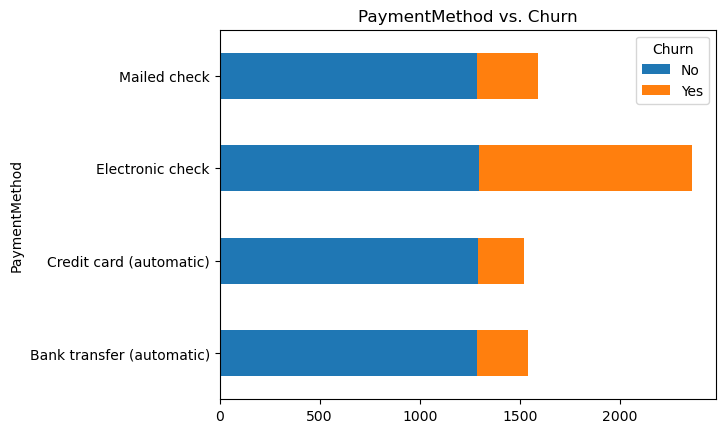

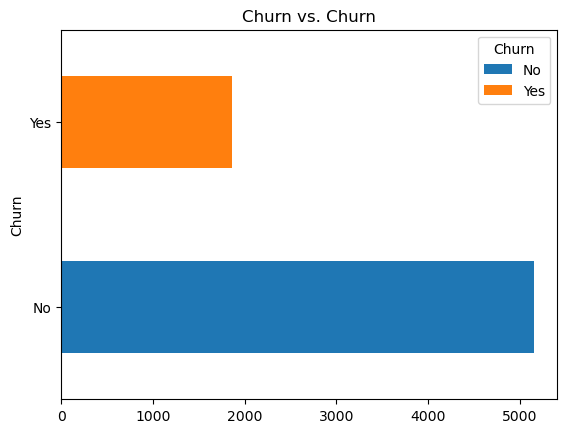

In [220]:
for col in object_cols:
    cross_df = pd.crosstab(df[col],df['Churn'])
    cross_df.plot(kind = 'barh', stacked = True)
    plt.title(f'{col} vs. Churn')

### Numerical Columns

#### UNIVARIATE NON-VIZ FOR NUMERICAL COLUMNS

In [221]:
numerical_cols=df.select_dtypes(include=['int64','float64'])

In [222]:
numerical_cols.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [223]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count','min', 'max', 'mean', 'median', 'std','skew','kurt']))
        print()

In [224]:
numerical_univariate_analysis(numerical_cols)

********** tenure **********
count     7010.000000
min          1.000000
max         72.000000
mean        32.520399
median      29.000000
std         24.520441
skew         0.233740
kurt        -1.388526
Name: tenure, dtype: float64

********** MonthlyCharges **********
count     7010.000000
min         18.250000
max        118.750000
mean        64.888666
median      70.400000
std         30.064769
skew        -0.225686
kurt        -1.252843
Name: MonthlyCharges, dtype: float64

********** TotalCharges **********
count     7010.000000
min         18.800000
max       8684.800000
mean      2290.353388
median    1403.875000
std       2266.820832
skew         0.958322
kurt        -0.238373
Name: TotalCharges, dtype: float64



#### UNIVARIATE VIZ FOR NUMERICAL COLUMNS

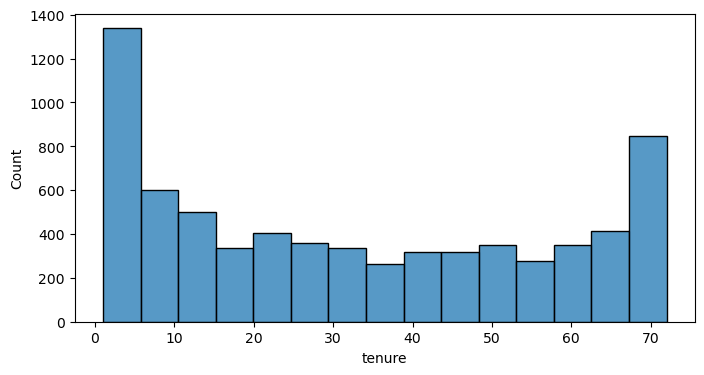

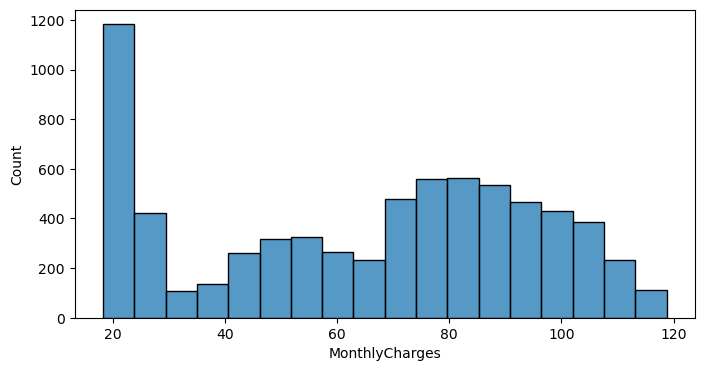

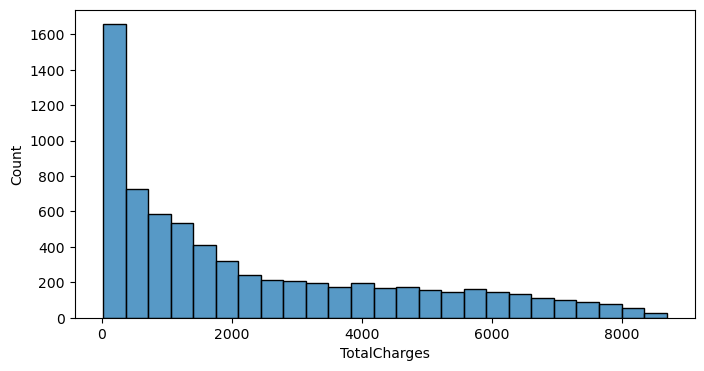

In [225]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot( x=col, data=df)

#### BIVARIATE VIZ FOR NUMERICAL VS CATERGORICAL COLUMNS

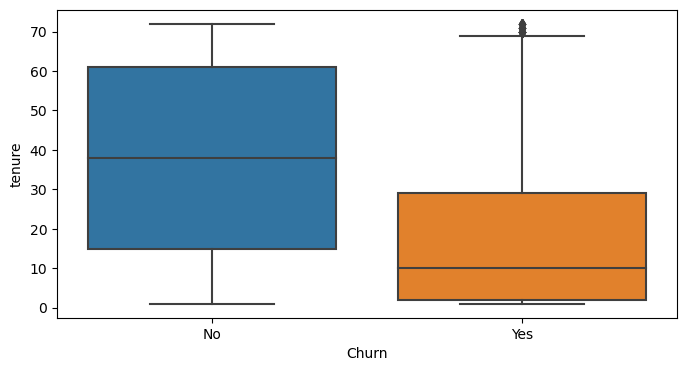

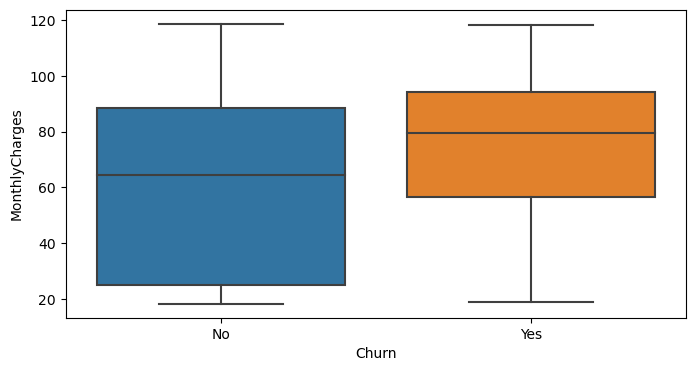

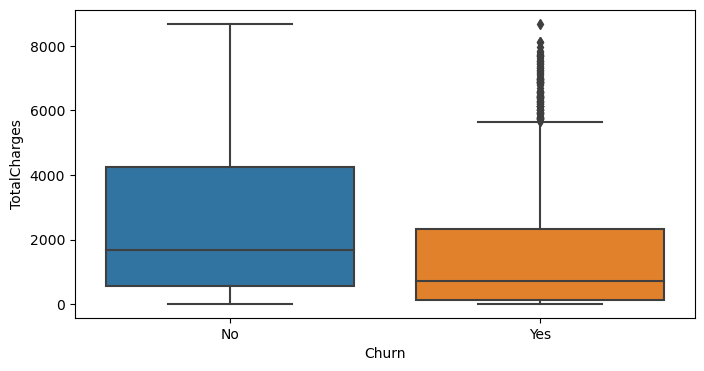

In [226]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df)

#### BIVARIATE NON-VIZ FOR NUMERICAL COLUMNS

In [227]:
correlation = numerical_cols.corr()
correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.244194,0.825293
MonthlyCharges,0.244194,1.000000,0.650540
TotalCharges,0.825293,0.650540,1.000000


#### BIVARIATE VIZ FOR NUMERICAL COLUMNS

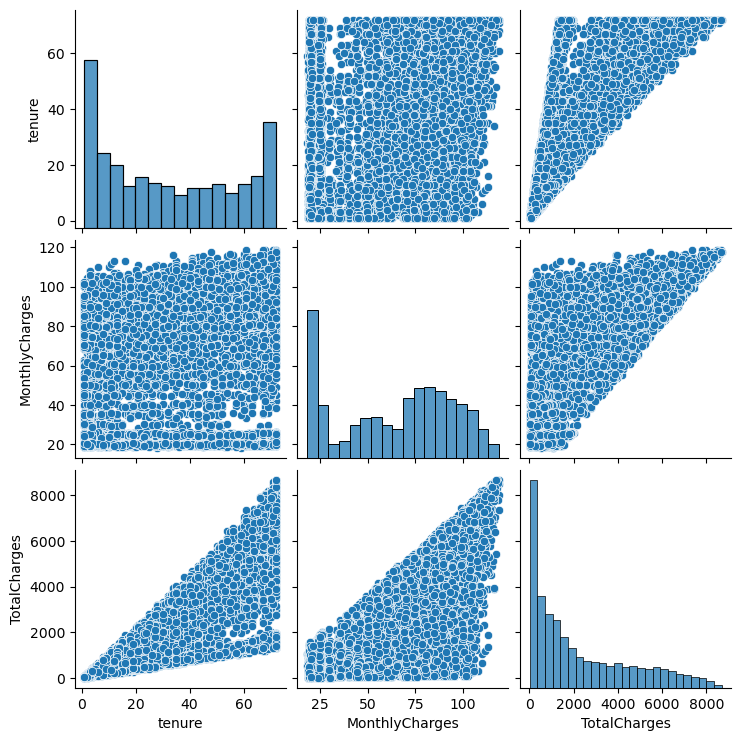

In [228]:
sns.pairplot(numerical_cols)

<Axes: >

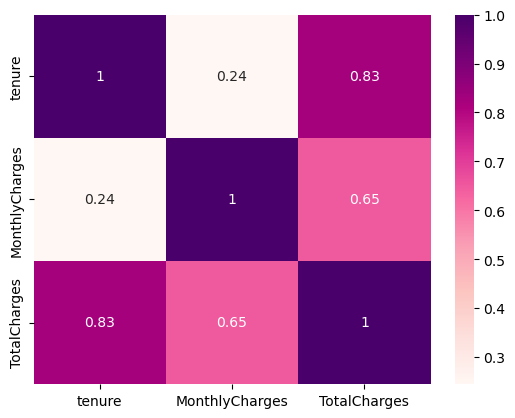

In [229]:
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='RdPu')

#### KDE PLOT BETWEEN TENURE AND CHURN

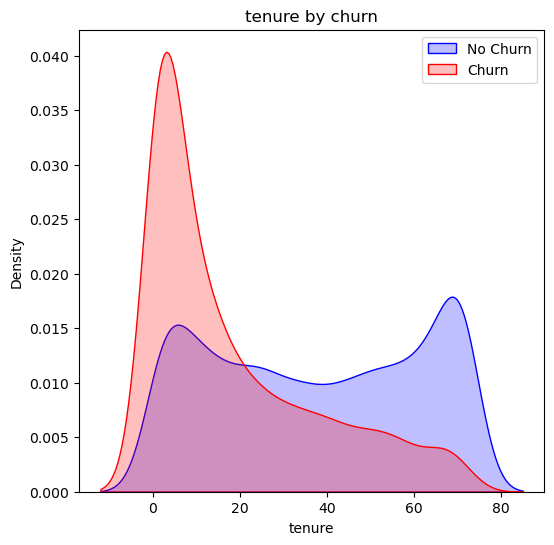

In [230]:
fig, axs = plt.subplots(figsize=(6,6)) 
axs = sns.kdeplot(df.loc[df["Churn"] == 'No', "tenure"] ,
                color="blue", fill = True)
axs = sns.kdeplot(df.loc[df["Churn"] == 'Yes', "tenure"],
                ax =axs, color="red", fill= True)
axs.legend(["No Churn","Churn"],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('tenure')
axs.set_title('tenure by churn')
plt.show()

#### KDE PLOT BETWEEN MONTHLY CHARGES AND CHURN

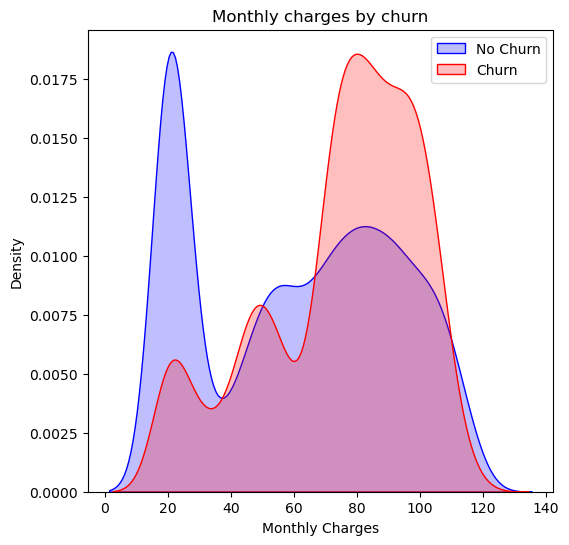

In [231]:
fig, axs = plt.subplots(figsize=(6,6)) 
axs = sns.kdeplot(df.loc[df["Churn"] == 'No', "MonthlyCharges"],
                color="blue", fill = True)
axs = sns.kdeplot(df.loc[df["Churn"] == 'Yes', "MonthlyCharges"],
                ax =axs, color="red", fill= True)
axs.legend(["No Churn","Churn"],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('Monthly Charges')
axs.set_title('Monthly charges by churn')
plt.show()

#### KDE PLOT BETWEEN TOTAL CHARGES AND CHURN

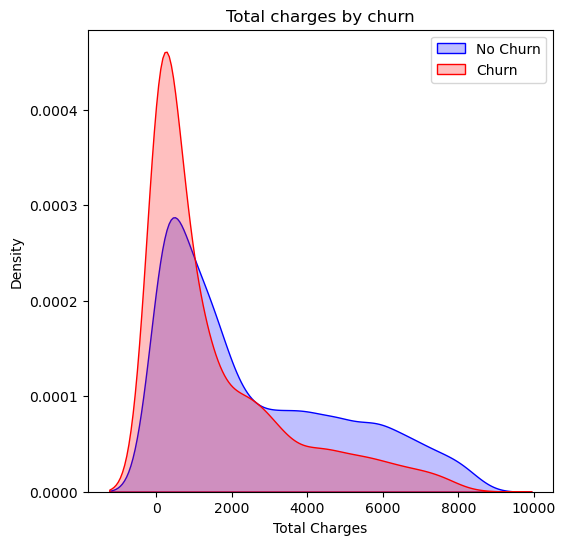

In [232]:
fig, axs = plt.subplots(figsize=(6,6))
axs = sns.kdeplot(df.loc[df["Churn"] == 'No', "TotalCharges"],
                color="blue", fill = True,ax=axs)
axs = sns.kdeplot(df.loc[df["Churn"] == 'Yes', "TotalCharges"],
                ax =axs, color="red", fill= True)
axs.legend(["No Churn","Churn"],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('Total Charges')
axs.set_title('Total charges by churn')
plt.show()

#### OBSERVATION

* Churn is high when the Monthly Charges are High.
* We can see that as the total charges are low the Churn rate is high.
* Higher Monthly Charge, Lower tenure and Lower Total Charge are link to High Churn.
* overall:
  * Electronic check medium are the highest churners.
  * Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
  * No Online security, No Tech Support category are high churners.

### MODEL BUILDING

### Step 1 - Identify predictors and Target Variables

In [233]:
x = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

y = df['Churn']

In [234]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [235]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7010, dtype: object

In [236]:
df.shape

(7010, 20)

### Step - 2. Split the data

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [239]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5257, 19) (1753, 19)
(5257,) (1753,)


### Step 3- Data Preprocessing For X_train

In [240]:
# Seperate Numerical and Categorical columns
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_num=X_train.select_dtypes(include=['int64','float64'])

In [241]:
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5471,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
4248,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Electronic check
2727,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
6369,Male,1,No,No,Yes,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check
4174,Female,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check
3276,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
1661,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)
2617,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [242]:
X_train_num

,tenure,MonthlyCharges,TotalCharges
5471,29,74.20,1993.25
4248,56,90.55,5116.60
2727,5,94.85,462.80
6369,67,105.05,7171.70
4174,37,28.60,973.55
...,...,...,...
4950,4,91.65,365.40
3276,4,79.15,317.25
1661,65,108.80,7082.45
2617,1,19.60,19.60


In [243]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)
X_train_cat_tansformed.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5471,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4248,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2727,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6369,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4174,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
5471,-0.147571,0.318593,-0.129141
4248,0.952422,0.863090,1.251465
2727,-1.125342,1.006291,-0.805641
6369,1.400567,1.345978,2.159875
4174,0.178353,-1.200004,-0.579876


In [245]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5471,-0.147571,0.318593,-0.129141,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4248,0.952422,0.863090,1.251465,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2727,-1.125342,1.006291,-0.805641,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6369,1.400567,1.345978,2.159875,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4174,0.178353,-1.200004,-0.579876,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Step 4 : Data Preprocessing for X_test

In [246]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [247]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
3719,-0.188311,-1.544686,-0.773860
2645,-1.288304,-1.493067,-1.001459
2945,-0.962380,0.365217,-0.717788
2706,-1.247563,0.391859,-0.943112
1902,1.604269,0.864755,1.837262


In [248]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_tansformed.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3719,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2706,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1902,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [249]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3719,-0.188311,-1.544686,-0.773860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2645,-1.288304,-1.493067,-1.001459,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2945,-0.962380,0.365217,-0.717788,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2706,-1.247563,0.391859,-0.943112,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1902,1.604269,0.864755,1.837262,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


## HYPERPARAMETER TUNING THROUGH GRIDSEARCH CV

In [250]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

### K-NEAREST NEIGHBOUR

In [251]:
from sklearn.neighbors import KNeighborsClassifier

In [252]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [170]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

knn_pred = clf.best_estimator_.predict(X_test_transformed)
knn_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', knn_model)

Best parameters set found on train set
{'n_neighbors': 24, 'p': 1}
KNeighborsClassifier(n_neighbors=24, p=1)

Score on Test Data:  0.7929264118653736


In [255]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['KNN classifier Predictions'] = knn_pred

output_df

,Actual,KNN classifier Predictions
3719,No,No
2645,No,No
2945,No,No
2706,Yes,Yes
1902,No,No
...,...,...
1533,Yes,Yes
4187,No,No
2560,Yes,No
705,Yes,No


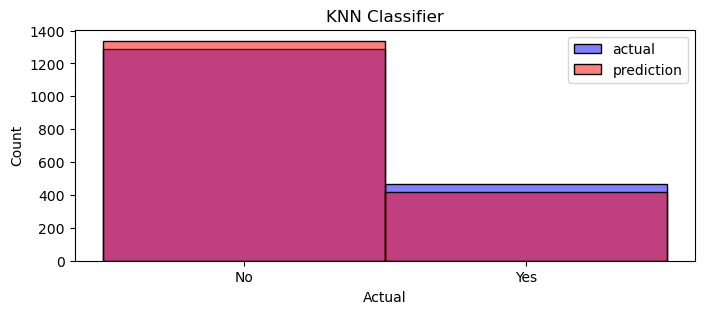

In [256]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN classifier Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()
plt.title('KNN Classifier')

# Display the plot
plt.show()


### LOGISTIC REGRESSION

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
tuned_parameters = [{'penalty': ['l1', 'l2','l1+l2']}]

clf = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueE

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'penalty': ['l1', 'l2', 'l1+l2']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [259]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

lg_pred = clf.best_estimator_.predict(X_test_transformed)
lg_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', lg_model)

Best parameters set found on train set
{'penalty': 'l2'}
LogisticRegression(max_iter=5000)

Score on Test Data:  0.8054763262977752


In [260]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Logistic Regression Predictions'] = lg_pred

output_df

,Actual,Logistic Regression Predictions
3719,No,No
2645,No,No
2945,No,No
2706,Yes,Yes
1902,No,No
...,...,...
1533,Yes,Yes
4187,No,No
2560,Yes,No
705,Yes,No


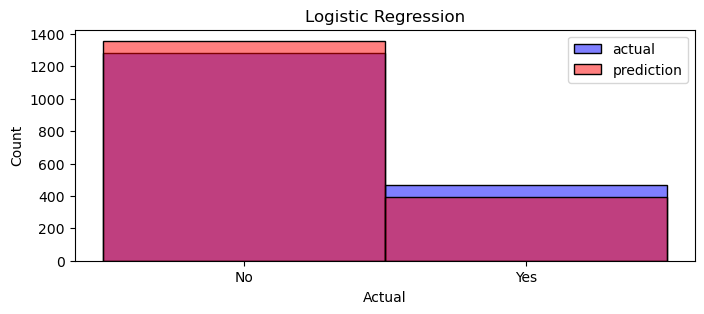

In [261]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Logistic Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()
plt.title("Logistic Regression")
plt.show()

### DECISION TREE

In [262]:
from sklearn.tree import DecisionTreeClassifier

In [263]:
tuned_parameters = [{'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 5, 10]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [264]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

dt_pred = clf.best_estimator_.predict(X_test_transformed)
dt_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ',dt_model)

Best parameters set found on train set
{'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10)

Score on Test Data:  0.7792355961209355


In [265]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Desicion Tree Predictions'] = lg_pred

output_df

,Actual,Desicion Tree Predictions
3719,No,No
2645,No,No
2945,No,No
2706,Yes,Yes
1902,No,No
...,...,...
1533,Yes,Yes
4187,No,No
2560,Yes,No
705,Yes,No


Text(0.5, 1.0, 'Decision Tree')

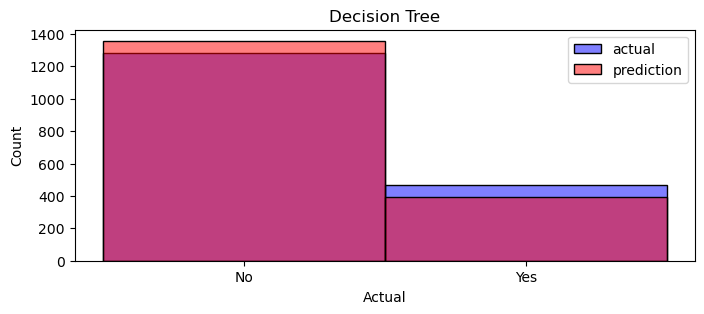

In [266]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Desicion Tree Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()
plt.title("Decision Tree")

###  RANDOM FOREST

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
tuned_parameters = [{'n_estimators': [50, 100, 200], 'max_depth': [5, 10]}]

clf = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [270]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

rf_pred = clf.best_estimator_.predict(X_test_transformed)
rf_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 10, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, n_estimators=200)

Score on Test Data:  0.7929264118653736


In [271]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Random Forest Predictions'] = rf_pred

output_df

,Actual,Random Forest Predictions
3719,No,No
2645,No,No
2945,No,No
2706,Yes,Yes
1902,No,No
...,...,...
1533,Yes,No
4187,No,No
2560,Yes,No
705,Yes,No


Text(0.5, 1.0, 'Random Forest')

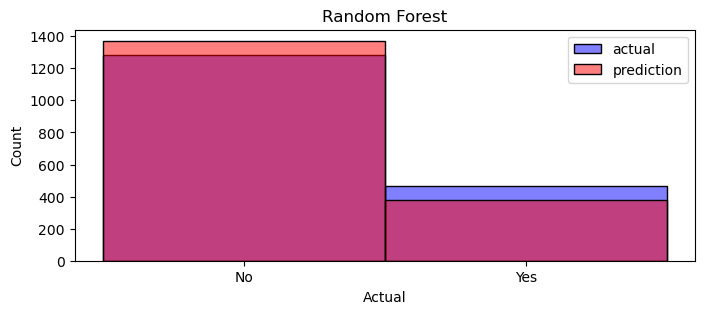

In [272]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Random Forest Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()
plt.title("Random Forest")